# Time Series Patterns

**Explanation:** Time series data often shows patterns over time, like a general trend (upward or downward), repeating seasonal effects, and random noise.

1. Date
Description: This column represents the date of each observation.
Unit: Date (in YYYY-MM-DD format).
Example: 2023-01-01 represents January 1, 2023.


2. Average_Temperature
Description: The average daily temperature recorded on that specific date.
Unit: Degrees Celsius (°C).
Example: A value of 13.38 indicates an average temperature of 13.38°C for that day.


3. Max_Temperature
Description: The maximum temperature recorded on that specific date.
Unit: Degrees Celsius (°C).
Example: A value of 14.65 indicates a maximum temperature of 14.65°C for that day.


4. Min_Temperature
Description: The minimum temperature recorded on that specific date.
Unit: Degrees Celsius (°C).
Example: A value of 10.17 indicates a minimum temperature of 10.17°C for that day.


5. Precipitation
Description: The amount of precipitation (rainfall) recorded on that specific date.
Unit: Millimeters (mm).
Example: A value of 5.13 indicates 5.13 mm of rainfall on that day.


6. Wind_Speed
Description: The average wind speed recorded on that specific date.
Unit: Kilometers per hour (km/h).
Example: A value of 13.35 indicates an average wind speed of 13.35 km/h on that day.


7. Weather_Condition
Description: A categorical description of the weather condition on that specific date (e.g., Sunny, Cloudy, Rainy).
Unit: Categorical (text).
Example: A value of Sunny indicates that the weather was sunny on that day.

## Import necessary libraries and load the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the time series data from the uploaded CSV file
data = pd.read_csv('weather_data_multi_year.csv', parse_dates=['Date'], index_col='Date')

# Select the column to analyze
series = data['Average_Temperature']

## Plot the time series data to observe patterns

In [ ]:
plt.plot(series)
plt.title("Average Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

# Decomposition Models

**Explanation:** Decomposition breaks down a time series into its trend, seasonal effects, and random noise components.

## Decompose the time series to observe trend, seasonality, and noise

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonality, and noise (residuals)
result = seasonal_decompose(series, model='additive', period=365)
result.plot()
plt.show()

# Additive Model

**Explanation:** In an additive model, the time series is viewed as the sum of its trend, seasonality, and noise.

## Perform additive decomposition

In [ ]:
# Additive decomposition to separate the series into trend, seasonality, and noise
result_add = seasonal_decompose(series, model='additive', period=365)
result_add.plot()
plt.show()

# Multiplicative Model

**Explanation:** A multiplicative model assumes the series is the product of trend, seasonality, and noise.

## Perform multiplicative decomposition

In [ ]:
# Multiplicative decomposition, which assumes seasonal variations change with trend
result_mult = seasonal_decompose(series, model='multiplicative', period=365)
result_mult.plot()
plt.show()




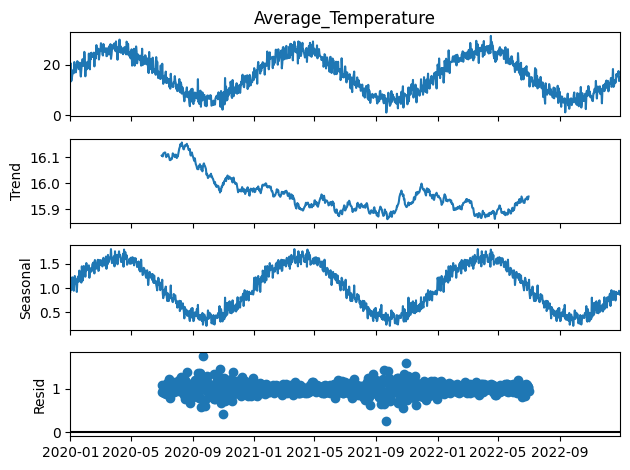

In [25]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Select the column to analyze
series = data['Average_Temperature']

# Add a constant to the series to ensure all values are positive
series_transformed = series + abs(series.min()) + 1  # Adding the absolute value of the minimum plus 1

# Perform multiplicative decomposition
result_mult = seasonal_decompose(series_transformed, model='multiplicative', period=365)
result_mult.plot()
plt.show()


# Smoothing Time Series

**Explanation:** Smoothing reduces noise to make patterns like trends more visible. It averages data points within a window.

## Smooth the time series data using a rolling mean

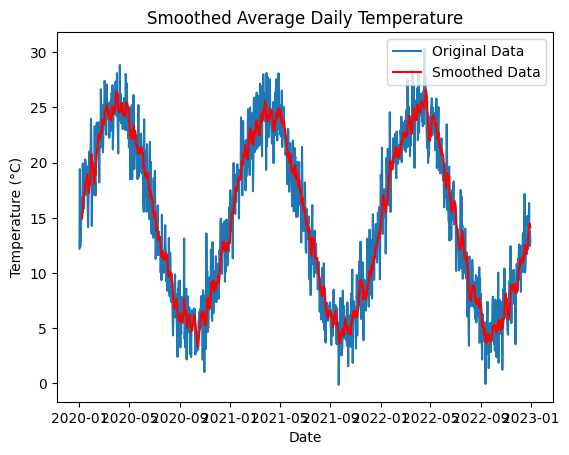

In [11]:
# Smoothing using a rolling mean (moving average)
smoothed_data = series.rolling(window=7).mean()

plt.plot(series, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data', color='red')
plt.title("Smoothed Average Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Moving Averages

**Explanation:** A moving average smooths the data by averaging over a fixed number of past points, helping to identify the trend.

## Calculate and plot the moving average

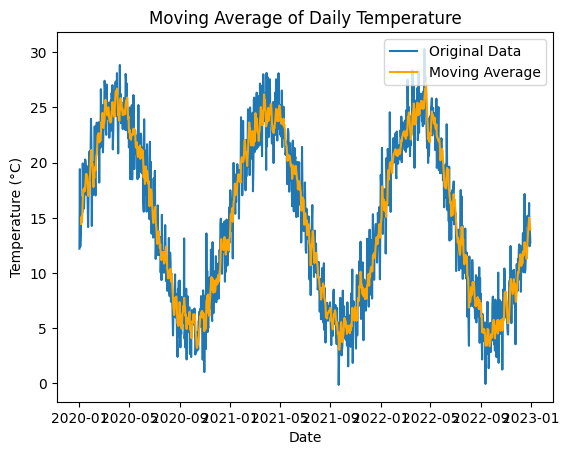

In [12]:
# Calculate the moving average to smooth the time series
moving_avg = series.rolling(window=5).mean()

# Plot the original data and the moving average
plt.plot(series, label='Original Data')
plt.plot(moving_avg, label='Moving Average', color='orange')
plt.title("Moving Average of Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Exponential Smoothing

**Explanation:** This method gives more weight to recent observations, making it responsive to changes while still smoothing the series.

## Apply Exponential Smoothing

/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


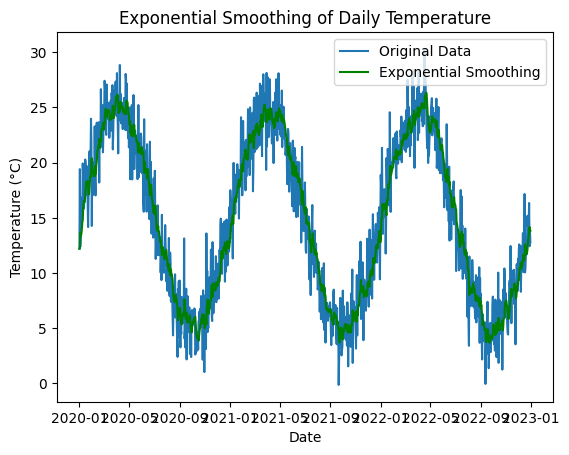

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Apply exponential smoothing to the time series
model = SimpleExpSmoothing(series)
fit = model.fit(smoothing_level=0.2)
exp_smooth = fit.fittedvalues

# Plot the original data and exponentially smoothed data
plt.plot(series, label='Original Data')
plt.plot(exp_smooth, label='Exponential Smoothing', color='green')
plt.title("Exponential Smoothing of Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Models for Forecasting

**Explanation:** Forecasting models predict future values based on past data. Simple models like exponential smoothing or more complex ones like ARIMA can be used.

## Fit and Forecast with Exponential Smoothing Model

/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


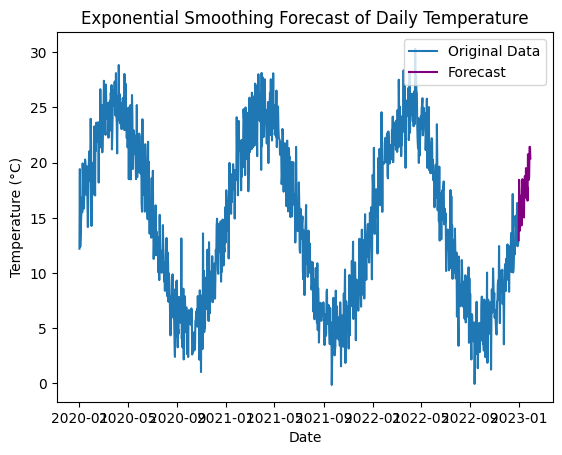

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
# Fit an Exponential Smoothing Model
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=365)
fit = model.fit()

# Forecast future values
forecast = fit.forecast(steps=30)

# Plot the original data and forecasted values
plt.plot(series, label='Original Data')
plt.plot(series.index[-1] + pd.to_timedelta(np.arange(1, 31), 'D'), forecast, label='Forecast', color='purple')
plt.title("Exponential Smoothing Forecast of Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Seasonal Indexing

**Explanation:** Seasonal indexing adjusts for seasonal variations in the data, which helps in more accurate forecasting.

## Calculate and Plot Seasonal Index

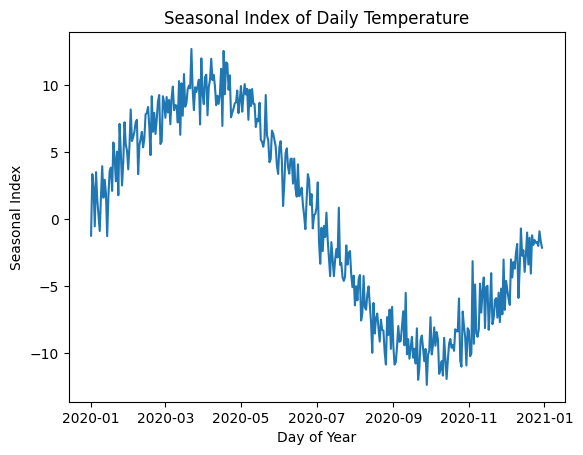

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose to get seasonal index
result = seasonal_decompose(series, model='additive', period=365)
seasonal_index = result.seasonal[:365]

# Plot the seasonal index
plt.plot(seasonal_index)
plt.title("Seasonal Index of Daily Temperature")
plt.xlabel("Day of Year")
plt.ylabel("Seasonal Index")
plt.show()

# Stationary Time Series

**Explanation:** A stationary series has consistent statistical properties (like mean and variance) over time, which is often a requirement for many forecasting models.

## Make the series stationary

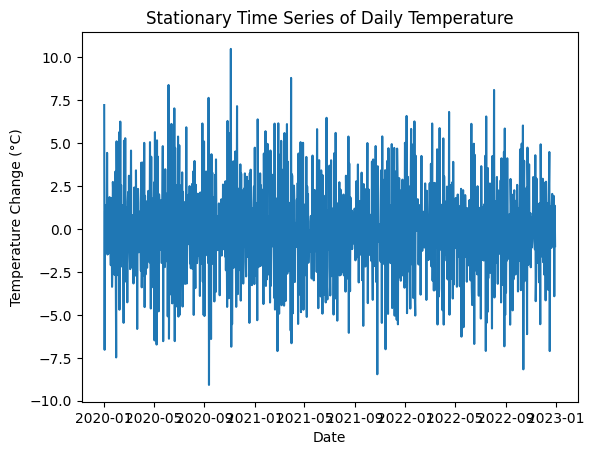

In [17]:
# Calculate the difference between consecutive data points to make the series stationary
stationary_series = series.diff().dropna()

# Plot the stationary time series
plt.plot(stationary_series)
plt.title("Stationary Time Series of Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature Change (°C)")
plt.show()

# Dickey_Fuller_Test_for_Stationarity

**Explanation:** The Dickey-Fuller test checks if your time series is stationary. If the p-value is low, the series is likely stationary.

## Perform the Dickey-Fuller test for stationarity

In [20]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


# Select the column to analyze
series = data['Average_Temperature']

# Perform the Dickey-Fuller test to check if the series is stationary
adf_result = adfuller(series)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Interpretation: A lower p-value (< 0.05) suggests the data is stationary.

ADF Statistic: -1.980489037072647
p-value: 0.2951929510083904


# Autoregressive_Model_AR

**Explanation:** An AR model predicts future values based on past values from the series itself, assuming past values influence future ones.

## Fit an Autoregressive (AR) model

/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


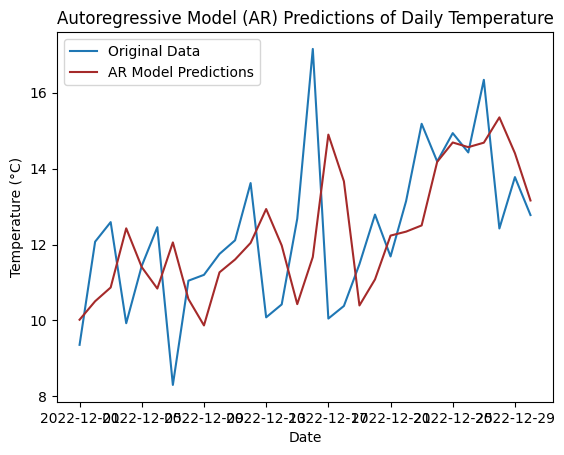

In [21]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Select the column to analyze
series = data['Average_Temperature']

# Fit an AR model to the time series data
model = AutoReg(series, lags=2)
fit = model.fit()

# Make predictions
predictions = fit.predict(start=len(series) - 30, end=len(series) - 1)

# Plot the original data and AR model predictions
plt.plot(series[-30:], label='Original Data')
plt.plot(series.index[-30:], predictions, label='AR Model Predictions', color='brown')
plt.title("Autoregressive Model (AR) Predictions of Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Moving_Average_Model_MA

**Explanation:** An MA model predicts future values based on the errors from past forecasts.

## Fit a Moving Average (MA) model

/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


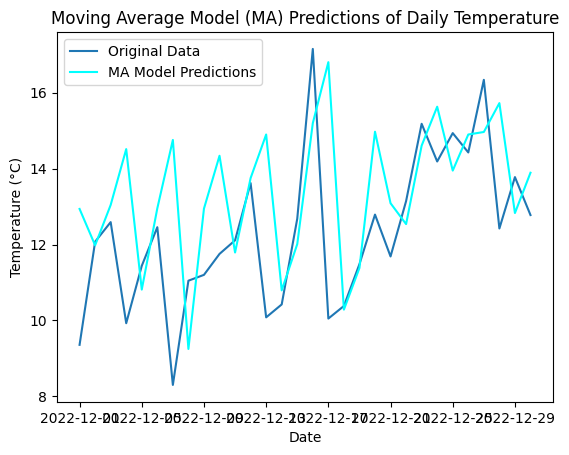

In [23]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Select the column to analyze
series = data['Average_Temperature']

# Fit a Moving Average (MA) model to the time series data
model = ARIMA(series, order=(0, 0, 2))
fit = model.fit()

# Make predictions
predictions = fit.predict(start=len(series) - 30, end=len(series) - 1)

# Plot the original data and MA model predictions
plt.plot(series[-30:], label='Original Data')
plt.plot(series.index[-30:], predictions, label='MA Model Predictions', color='cyan')
plt.title("Moving Average Model (MA) Predictions of Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# ARIMA Model

**Explanation:** ARIMA combines autoregression (AR), differencing (to make data stationary), and moving average (MA) components to model time series data.

## Fit an ARIMA model

/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/giridharsripathi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


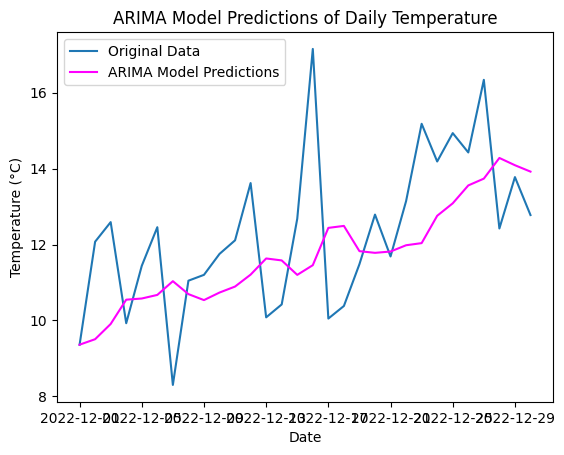

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the time series data
model = ARIMA(series, order=(2, 1, 2))
fit = model.fit()

# Make predictions with ARIMA
predictions = fit.predict(start=len(series) - 30, end=len(series) - 1, typ='levels')

# Plot the original data and ARIMA model predictions
plt.plot(series[-30:], label='Original Data')
plt.plot(series.index[-30:], predictions, label='ARIMA Model Predictions', color='magenta')
plt.title("ARIMA Model Predictions of Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()